# 进入mmdetection主目录

In [1]:
import os
os.chdir('mmdetection')

# 目标检测算法:RTMDet

In [2]:
!python tools/train.py data/rtmdet_tiny_ear.py

06/04 21:06:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1818723964
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04.1) 11.3.0
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code

# 测试集上评估模型精度

In [3]:
!python tools/test.py data/rtmdet_tiny_ear.py \
                      work_dirs/rtmdet_tiny_ear/epoch_200.pth

06/04 22:35:10 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1968414328
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04.1) 11.3.0
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code

# 导入工具包

In [4]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

# 载入训练日志

In [5]:
# 日志文件路径
log_path = 'work_dirs/rtmdet_tiny_ear/20230604_210651/vis_data/scalars.json'

In [6]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [7]:
len(json_list)

4257

In [8]:
eval(json_list[4])

{'lr': 1.6055855855855853e-05,
 'data_time': 1.313084888458252,
 'loss': 0.07454374730587006,
 'loss_cls': 0.06712101399898529,
 'loss_bbox': 0.007422733632847667,
 'time': 1.8720549106597901,
 'epoch': 1,
 'iter': 5,
 'memory': 2673,
 'step': 5}

In [9]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████| 4257/4257 [00:01<00:00, 3558.11it/s]


In [10]:
df_train

,lr,data_time,loss,loss_cls,loss_bbox,time,epoch,iter,memory,step
0,4.000000e-08,4.307158,0.069710,0.067279,0.002431,6.412169,1.0,1.0,2636.0,1.0
1,4.043964e-06,2.154558,0.074944,0.067257,0.007687,3.292818,1.0,2.0,2673.0,2.0
2,8.047928e-06,1.436798,0.074993,0.067218,0.007775,2.252835,1.0,3.0,2673.0,3.0
3,1.205189e-05,1.077921,0.074186,0.067166,0.007020,1.731930,1.0,4.0,2673.0,4.0
4,1.605586e-05,1.313085,0.074544,0.067121,0.007423,1.872055,1.0,5.0,2673.0,5.0
...,...,...,...,...,...,...,...,...,...,...
4195,3.058193e-03,0.547932,0.298907,0.081406,0.217501,0.717666,200.0,4196.0,2673.0,4196.0
4196,3.056557e-03,0.547933,0.300075,0.082048,0.218027,0.717558,200.0,4197.0,2673.0,4197.0
4197,3.054919e-03,0.547929,0.301232,0.082773,0.218458,0.717543,200.0,4198.0,2673.0,4198.0
4198,3.053280e-03,0.547920,0.300813,0.083262,0.217551,0.717463,200.0,4199.0,2673.0,4199.0


In [11]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.032,0.151,0.004,-1.0,-1.0,0.032,0.308209,0.350344,5.0
1,0.259,0.829,0.076,-1.0,-1.0,0.259,0.300161,0.331259,10.0
2,0.344,0.786,0.191,-1.0,-1.0,0.344,0.302696,0.327914,15.0
3,0.254,0.704,0.125,-1.0,-1.0,0.254,0.302247,0.327566,20.0
4,0.384,0.940,0.208,-1.0,-1.0,0.384,0.302254,0.327478,25.0
5,0.600,0.936,0.792,-1.0,-1.0,0.600,0.300761,0.327197,30.0
6,0.597,0.934,0.783,-1.0,-1.0,0.597,0.300360,0.328121,35.0
7,0.595,0.961,0.645,-1.0,-1.0,0.595,0.300561,0.324675,40.0
8,0.671,0.895,0.865,-1.0,-1.0,0.671,0.303107,0.328189,45.0
9,0.608,0.954,0.824,-1.0,-1.0,0.608,0.300233,0.326550,50.0


# 导出训练日志

In [12]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

# 可视化辅助函数

In [17]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

# 训练集损失函数

In [19]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

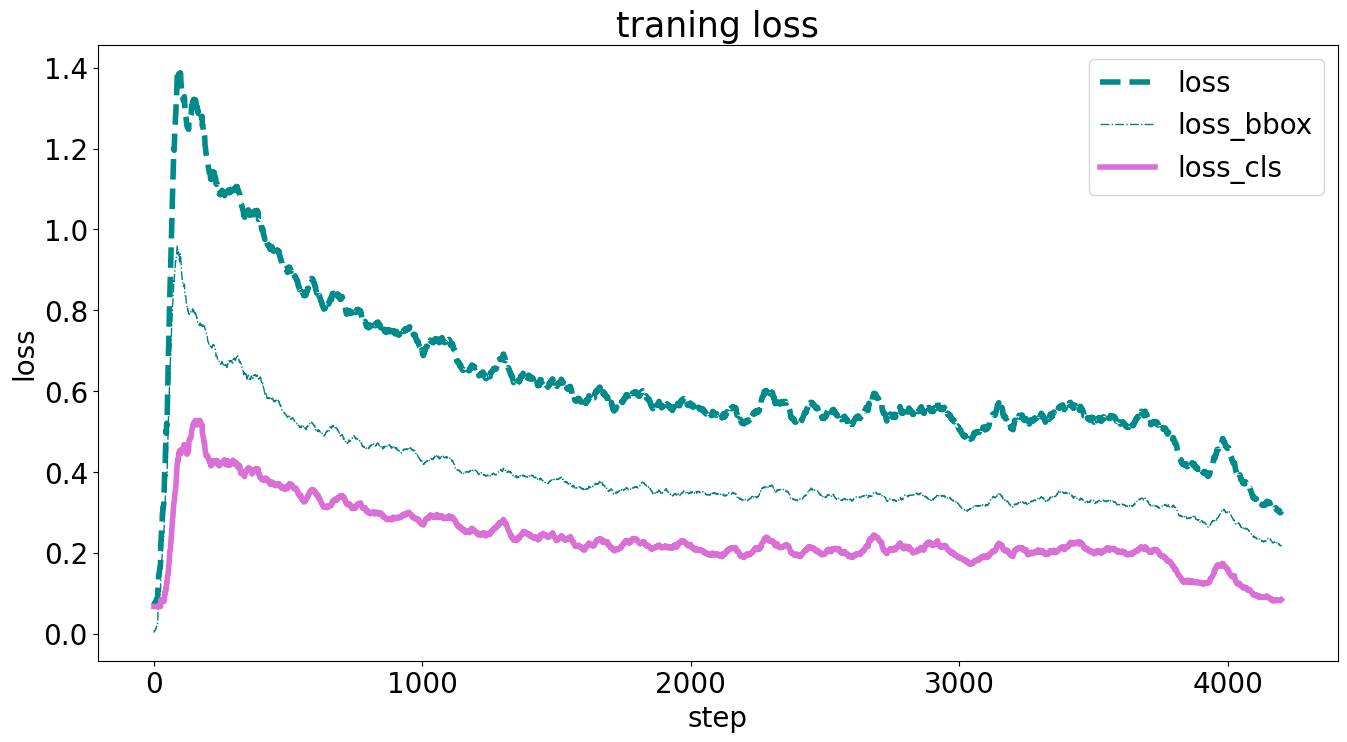

In [20]:
metrics = ['loss', 'loss_bbox', 'loss_cls']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('traning loss', fontsize=25)
plt.savefig('training_loss.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 测试集评估-MS COCO

In [21]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

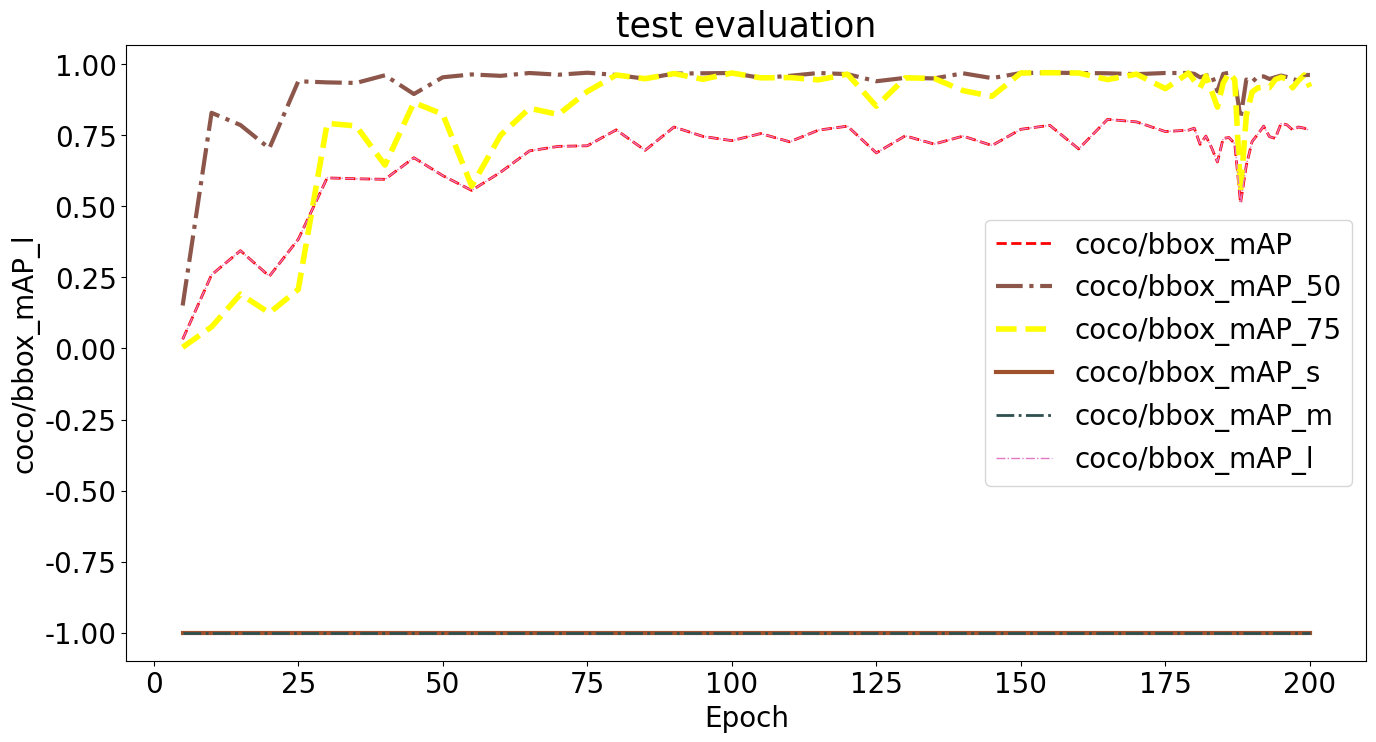

In [22]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('test evaluation', fontsize=25)
plt.savefig('test_evaluation.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 模型轻量化转换

In [23]:
# RTMDet-tiny
!python tools/model_converters/publish_model.py \
        work_dirs/rtmdet_tiny_ear/epoch_200.pth \
        checkpoint/rtmdet_tiny_ear_epoch_200_202306042305.pth

06/04 23:06:51 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 23:06:51 - mmengine - INFO - Key `optimizer` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 23:06:51 - mmengine - INFO - Key `param_schedulers` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 23:06:51 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 23:06:51 - mmengine - INFO - The published model is saved at checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth.


# 目标检测预测-单张图像

In [25]:
# RTMDet
!python demo/image_demo.py \
        data/test_ear/ear_pic.jpg \
        data/rtmdet_tiny_ear.py \
        --weights checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth \
        --out-dir outputs/ear_rtmdet \
        --device cuda:0 \
        --pred-score-thr 0.3

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth
06/04 23:17:07 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/04 23:17:07 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/leo/miniconda3/envs/openmmlab/lib/python3.10/site-packages/torch/functiona━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
l.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be 
required to pass the indexing argument. (Triggered internally at 
/opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape
.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Infer

In [26]:
# RTMDet
!python demo/video_demo.py \
        data/test_ear/ear_vid.mp4 \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth \
        --device cuda:0 \
        --score-thr 0.6 \
        --out outputs/ear_out_video_rtmdet.mp4

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth
06/04 23:19:39 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/188, elapsed: 0s, ETA:/home/leo/miniconda3/envs/openmmlab/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 188/188, 15.8 task/s, elapsed: 12s, ETA:     0s
